# 🧹 Task 2: Data Cleaning – NYC Airbnb Dataset

This notebook performs data cleaning operations on the Airbnb NYC 2019 dataset. Tasks include:
- Checking data integrity
- Handling missing values
- Removing duplicates
- Standardizing formats
- Detecting outliers

In [22]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## Step 1: Load the Dataset
Let's begin by loading the dataset and checking the first few rows.


In [23]:
# 📂 Load Dataset
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [24]:
# 🔍 Understand the Data
df.info()
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [25]:
# 🧼 Check for Missing Values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [26]:
# ✂️ Handle Missing Data
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [27]:
# 🧾 Remove Duplicates
print("Duplicate rows:", df_cleaned.duplicated().sum())
df_cleaned = df_cleaned.drop_duplicates()

Duplicate rows: 0


In [28]:
# ✅ Standardize Format
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')
df_cleaned['neighbourhood_group'] = df_cleaned['neighbourhood_group'].str.lower()

In [29]:
# 🚨 Detect & Remove Outliers in 'price'
df_cleaned['price'].describe()

count    38821.000000
mean       142.332526
std        196.994756
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

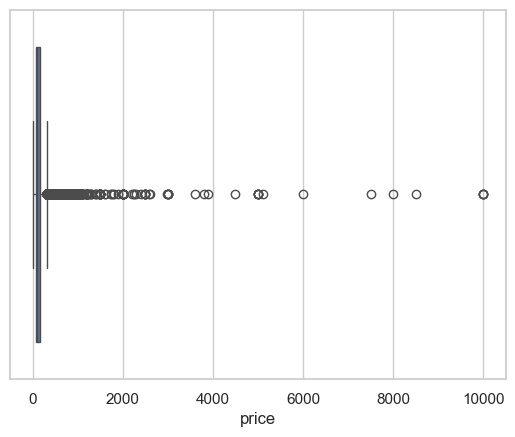

In [30]:
sns.boxplot(x=df_cleaned['price'])

In [31]:
# Remove rows where price > 500 (extreme outliers)
df_cleaned = df_cleaned[df_cleaned['price'] <= 500]

In [32]:
# 📊 Final Summary
df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 38199 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38199 non-null  int64  
 1   name                            38199 non-null  object 
 2   host_id                         38199 non-null  int64  
 3   host_name                       38199 non-null  object 
 4   neighbourhood_group             38199 non-null  object 
 5   neighbourhood                   38199 non-null  object 
 6   latitude                        38199 non-null  float64
 7   longitude                       38199 non-null  float64
 8   room_type                       38199 non-null  object 
 9   price                           38199 non-null  int64  
 10  minimum_nights                  38199 non-null  int64  
 11  number_of_reviews               38199 non-null  int64  
 12  last_review                     38199

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.819900e+04,3.819900e+04,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000
mean,1.807504e+07,6.394245e+07,40.728045,-73.950756,128.058300,5.859342,29.472002,1.377386,5.118616,113.455666
std,1.068612e+07,7.568143e+07,0.055211,0.046814,84.240864,17.384229,48.372219,1.685434,26.168512,129.035091
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.692402e+06,7.020360e+06,40.688470,-73.982190,68.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.884251e+07,2.818945e+07,40.721440,-73.954440,100.000000,2.000000,10.000000,0.720000,1.000000,53.000000
75%,2.753990e+07,1.013990e+08,40.763130,-73.934540,165.000000,4.000000,34.000000,2.030000,2.000000,225.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,500.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## ✅ Conclusion and Next Steps
This cleaned dataset is now ready for further analysis or visualization. We improved integrity by:
- Dropping or imputing missing values
- Removing duplicates
- Fixing inconsistent data types
- Flagging extreme outliers

Next step: Use this data for EDA or modeling.
